In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Upload file dataset
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
# Membaca file heart.csv
data = pd.read_csv('heart.csv')

# melihat informasi dataset pada 5 baris pertama
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# memisahkan atribut dan label
X = data.drop(["target"], axis=1)
X[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
Y = data["target"].values
Y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
# split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [ ]:
# Untuk mengetahui panjang/jumldah data pada x_train , x_test, y_train, y_test
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


# Naive Bayes Model

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(acc)
print(cm)

0.8524590163934426
[[15  6]
 [ 3 37]]


In [ ]:
# Melihat tingkat akurasi pada variable test
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.86      0.93      0.89        40

    accuracy                           0.85        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.85      0.85        61



# KNN

In [ ]:
# membagi dataset menjadi training dan testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size= 0.2, random_state=3)

# Untuk mengetahui panjang/jumldah data pada x_train , x_test, y_train, y_test
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [ ]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [ ]:
from sklearn.model_selection import cross_val_score

k = 25
#Membuat model KNN  
neigh = KNeighborsClassifier(n_neighbors = k)

# Melakukan pelatihan model terhadap data
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
# prediksi model dengan neigh.predict
yhat = neigh.predict(X_test)
print(yhat[0:10]) #data prediksi
print(y_test[0:10]) #data test

[0 1 1 1 1 1 0 0 1 1]
[0 1 1 1 1 1 0 0 0 1]


In [ ]:
# Menampilkan akurasi data train set dan test set
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

Test set Accuracy:  0.9016393442622951
Train set Accuracy:  0.8305785123966942


In [ ]:
# Mencari nilai K yang paling optimal
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78688525, 0.78688525, 0.85245902, 0.78688525, 0.81967213,
       0.81967213, 0.81967213, 0.83606557, 0.83606557, 0.86885246,
       0.81967213, 0.85245902, 0.83606557, 0.86885246, 0.85245902,
       0.86885246, 0.86885246, 0.8852459 , 0.8852459 , 0.8852459 ,
       0.86885246, 0.8852459 , 0.8852459 , 0.8852459 , 0.90163934,
       0.8852459 , 0.90163934, 0.90163934, 0.90163934, 0.90163934,
       0.8852459 , 0.90163934, 0.8852459 , 0.85245902, 0.85245902,
       0.86885246, 0.86885246, 0.8852459 , 0.8852459 , 0.8852459 ,
       0.8852459 , 0.8852459 , 0.85245902, 0.86885246, 0.85245902,
       0.85245902, 0.85245902, 0.86885246, 0.86885246, 0.86885246,
       0.86885246, 0.86885246, 0.86885246, 0.86885246, 0.86885246,
       0.86885246, 0.86885246, 0.86885246, 0.86885246, 0.86885246,
       0.86885246, 0.86885246, 0.86885246, 0.86885246, 0.86885246,
       0.86885246, 0.86885246, 0.86885246, 0.86885246, 0.86885246,
       0.85245902, 0.86885246, 0.86885246, 0.86885246, 0.86885

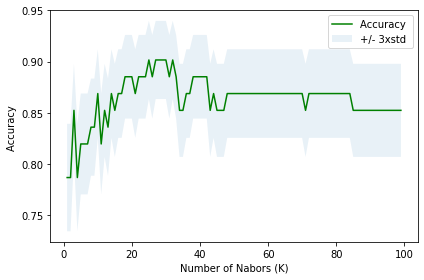

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9016393442622951 with k= 25


In [ ]:
# Melihat tingkat akurasi pada variable test
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat.round()))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        21
           1       0.84      0.95      0.89        40

    accuracy                           0.85        61
   macro avg       0.86      0.81      0.83        61
weighted avg       0.85      0.85      0.85        61



# Decition tree

In [ ]:
# membagi dataset menjadi training dan testing
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.2, random_state = 5)

In [ ]:
# Membuat model decision tree
treeModel = DecisionTreeClassifier(criterion="gini", max_depth=5)

In [ ]:
# melakukan pelatihan model terhadap data
treeModel.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# prediksi model dengan tree_model.predict
predTree = treeModel.predict(X_testset)

In [ ]:
# Untuk melihat akurasi, sejauh mana predTree memenuhi jawaban yang sesungguhnya yaitu y_testset
print (predTree [0:10])
print (y_testset [0:10])

[1 0 0 0 1 0 1 0 1 1]
[0 0 0 0 1 0 1 0 1 1]


In [ ]:
# Menampilkan akurasi data train set dan test set

print("DecisionTrees's Test set Accuracy: ", metrics.accuracy_score(y_testset, predTree))
print("DecisionTrees's Train set Accuracy: ", metrics.accuracy_score(y_trainset, treeModel.predict(X_trainset)))

DecisionTrees's Test set Accuracy:  0.819672131147541
DecisionTrees's Train set Accuracy:  0.9338842975206612


In [ ]:
# Melihat tingkat akurasi pada variable test
from sklearn.metrics import classification_report
print(classification_report(y_testset, predTree.round()))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

